# **GRIP @ The Sparks Foundation**
# **Author: Sanjoy Paul**
## **Domain: Data Science & Business Analytics**
## **Task-6: Prediction using Decision Tree Algorithm**
### **Dataset: https://bit.ly/3kXTdox**

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading the Dataset

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.shape

(150, 6)

### Data Preprocessing

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [8]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

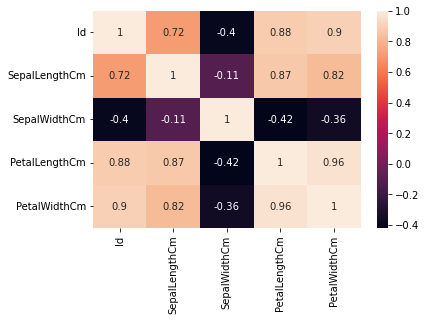

In [9]:
sns.heatmap(data=df.corr(),annot=True)

In [10]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
df[df.Species=='Iris-setosa'].head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [12]:
df[df.Species=='Iris-versicolor'].head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor


In [13]:
df[df.Species=='Iris-virginica'].head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
106,107,4.9,2.5,4.5,1.7,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica


### Independent and Dependent Features

In [14]:
features=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X=df.loc[:, features].values
y=df.Species

### Splitting into training and test set 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
X_train.shape

(100, 4)

In [17]:
X_test.shape

(50, 4)

### Prediction (Decision Tree Algorithm)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
dtree.predict([[5.1,3.5,1.4,0.2]])

array(['Iris-setosa'], dtype=object)

In [20]:
dtree.predict([[5.7,2.8,4.5,1.3]])

array(['Iris-versicolor'], dtype=object)

In [21]:
dtree.predict([[7.2,3.6,6.1,2.5]])

array(['Iris-virginica'], dtype=object)

In [22]:
y_pred=dtree.predict(X_test)

### Accuracy Score

In [23]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_pred)
print("Accuracy Score:",score)

Accuracy Score: 0.98


### Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm

Confusion Matrix:


array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

Text(33.0, 0.5, 'Actual Label')

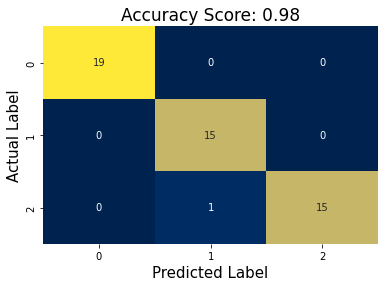

In [25]:
sns.heatmap(cm, annot=True,cbar=False,cmap='cividis')
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.xlabel('Predicted Label',fontsize=15)
plt.ylabel('Actual Label',fontsize=15)

### Classification Report

In [26]:
from sklearn.metrics import classification_report
c_report=classification_report(y_test, y_pred)
print(c_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [29]:
max_depth_range = list(range(1, 6))

accuracy = []
for depth in max_depth_range:
    dtree = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    dtree.fit(X_train, y_train)
    score = dtree.score(X_test, y_test)
    accuracy.append(score)

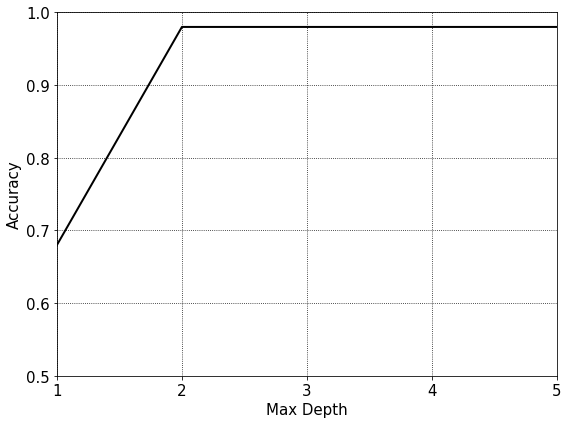

In [35]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6));
ax.plot(max_depth_range, accuracy, lw=2, color='k')
ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True, axis = 'both', zorder = 0, linestyle = ':', color = 'k')
ax.tick_params(labelsize = 15)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('Max Depth', fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)
fig.tight_layout()

### Decision Tree Graph

In [36]:
from sklearn import tree

[Text(453.375, 498.3, 'X[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(383.625, 407.70000000000005, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(523.125, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(348.75, 317.1, 'X[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(279.0, 226.5, 'X[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(139.5, 135.89999999999998, 'X[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(69.75, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(209.25, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(418.5, 135.89999999999998, 'X[1] <= 2.25\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(348.75, 45.299999999999955, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(488.25, 45.299999999999955, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(418.5, 226.5, 'gini = 0.0\nsampl

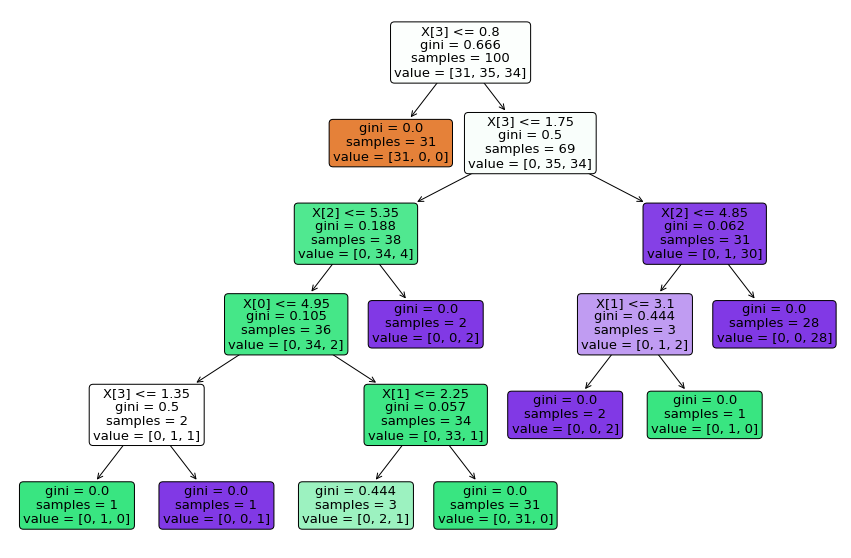

In [37]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True, rounded=True)

[Text(223.2, 453.0, 'X[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(111.6, 271.8, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(334.79999999999995, 271.8, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(223.2, 90.59999999999997, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(446.4, 90.59999999999997, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

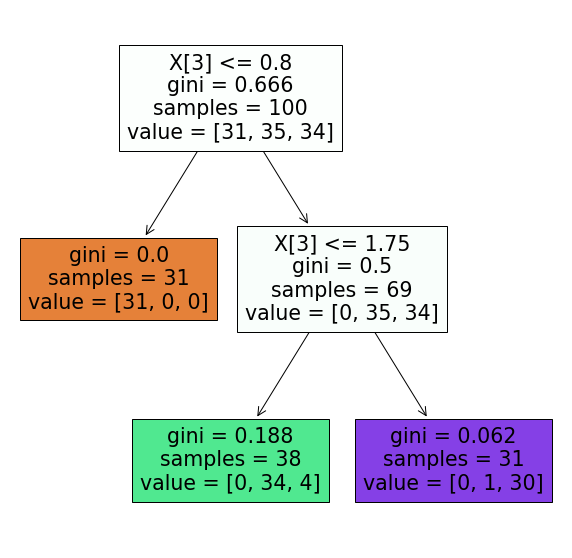

In [39]:
dtree= DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train,y_train)
plt.figure(figsize=(10,10))
tree.plot_tree(dtree,filled=True)

# Thank You